In [1]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [2]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [3]:
def cosine_distance(x, y):
    return 1.0 - cosine_similarity

In [4]:
def manhattan_distance(x,y):
    
    return np.sum(np.absolute(x - y))

In [5]:
def chi_square_distance(x,y):
    return 0.5 * (np.sum(((x - y) ** 2) / (x + y)))

In [1]:
N_Q = 1
CONST_K = 1.25
CONST_ANMRR = 0.5
GT = ["a_1","a_9","b_9"]  #must be name of samples
r = ["9_a", "p_0", "ye_0","k_9","55_8","a_1","a_9","b_9"]

print(type(GT))

<type 'list'>


In [2]:
def ANMRR(all_query,all_GT):
    total = 0.0
    
    for q in range(len(all_query)):
        total = total + one_sample_nmrr(all_query[q], all_GT[q])
        #print("ANMRR : ", total)
        
    return (1.0/len(all_query)) * total



In [3]:
def one_sample_nmrr(q, GT):
    part_1 = rank_mean(q, GT) - (CONST_ANMRR * (1.0 + len(GT)))
    part_2 = (CONST_K * 2.0 * len(GT))- (CONST_ANMRR * (1.0 + len(GT)))
    #print("rank_mean: ", rank_mean(q, GT))
    #print("part_1:" , part_1)
    #print("part_2:" ,part_2)
    return part_1/part_2

In [4]:
def rank_mean(q, GT):
    const_q = len(GT)
    #print("rank_m (cons_q) :" , const_q )
    #print("sum_rank_q: ",sum_rank_q(q))
   
    return (1.0/const_q)*sum_rank_q(q, GT)
  

In [5]:
def sum_rank_q(q, GT):
    
    total_pos = 0.0
    penalty = 2 * CONST_K * (len(GT))
    const_size = 2 *  (len(GT))
    #print(const_size)
    for j in range(len(GT)):
        if q.index(GT[j]) <= const_size:
            total_pos = total_pos + q.index(GT[j])+1
            #print("sm :",GT[j] )
            #print("index :",q.index(GT[j]) )
        else:
            total_pos = total_pos + penalty
        #print("0")
                
    #print("total_pos : " , total_pos)
    return total_pos

In [6]:
all_query = []
all_GT = []
all_query.append(r) # for retrieved image list
#all_query.append(r)

all_GT.append(GT) #for GT's

print(len(all_query))

print(all_query[0])

print(ANMRR(all_query, all_GT))

1
['9_a', 'p_0', 'ye_0', 'k_9', '55_8', 'a_1', 'a_9', 'b_9']
0.878787878788


In [7]:
def MAP(all_query, all_GT):
    total = 0.0
    size_Q = len(all_query)
    
    for q in range(len(all_query)):
        total = total + precision_mean(all_query[q], all_GT[q])
        #print("MAP : ", total) #0.4166
        
    return total/size_Q




In [7]:
from sklearn.metrics import average_precision_score
def new_MAP(all_query, all_GT):
    total = 0.0
    size_Q = len(all_query)
    #print("size_q :" , size_Q)
    for q in range(len(all_query)):
        total = total + average_precision_score(all_query[q], all_GT[q])
        #print("MAP : ", total) #
        
    return total/size_Q

In [ ]:
def precision_mean(q, GT):
    part_1 = sum_P_R(q, GT)
    part_2 = find_relevants(q, GT)
    #print("part 1:", part_1) #0.833
    #print("part 2:", part_2) #2
    return float(part_1)/part_2
    
    

In [ ]:
def find_relevants(q , GT):
    relevants = 1
    for j in range(len(GT)):
        for i in range(len(q)):
            if numeric_labels(q[i]) == numeric_labels(GT[i]):
                relevants = relevants + 1
  
    return (relevants - 1)/(len(GT))
   

In [ ]:
def sum_P_R(q, GT):
    
    total = 0.0
    
    for j in range(len(GT)):
        #print(j)
        for i in range(len(q)):
            pre = P(q, GT[j], i+1)
            r = R(q[i], GT[j])
            total = total + ( pre * r)
            #print("i, P",i, pre)
            #print("r: ", r)
            #print("totat_pr", total)
    #print("total", total/len(GT)) #0.833
    return total/len(GT)
    

In [ ]:
dir_list = []
i = 1
    # r=root, d=directories, f = files
for r, d, f in os.walk('/home/ozgu/Desktop/DATASETS/UCMerced_LandUse/train/'):
    if i == 1:
        dir_list = d
        break

print("done: ", sorted(dir_list))

sorted_list = sorted(dir_list)
    

In [ ]:
import os

def numeric_labels(element):
    element = str(element).split("_")
   # print(element[0])
   
    if element[0] == sorted_list[0]:
        return 1
    elif element[0] == sorted_list[1]:
        return 2
    elif element[0] == sorted_list[2]:
        return 3
    elif element[0] == sorted_list[3]:
        return 4
    elif element[0] == sorted_list[4]:
        return 5
    elif element[0] == sorted_list[5]:
        return 6
    elif element[0] == sorted_list[6]:
        return 7
    elif element[0] == sorted_list[7]:
        return 8
    elif element[0] == sorted_list[8]:
        return 9
    elif element[0] == sorted_list[9]:
        return 10
    elif element[0] == sorted_list[10]:
        return 11
    elif element[0] == sorted_list[11]:
        return 12
    elif element[0] == sorted_list[12]:
        return 13
    elif element[0] == sorted_list[13]:
        return 14
    elif element[0] == sorted_list[14]:
        return 15
    elif element[0] == sorted_list[15]:
        return 16
    elif element[0] == sorted_list[16]:
        return 17
    elif element[0] == sorted_list[17]:
        return 18
    elif element[0] == sorted_list[18]:
        return 19
    elif element[0] == sorted_list[19]:
        return 20
    elif element[0] == sorted_list[20]:
        return 21
    else:
        return 0
    


In [ ]:
def P(q, ground_element, pos):
    true_s = 0
    false_s = 0
    
    for i in range(pos):
        if numeric_labels(q[i]) == numeric_labels(ground_element):
            true_s = true_s + 1
            #print("true :" ,true_s)
      
            #print("wrong match!", true_s)
           
        
    
    
    return float(true_s)/float(pos)

In [ ]:
def R(element, ground_element):
    if numeric_labels(element) == numeric_labels(ground_element):
        return 1.0
    else:
        return 0.0
    

In [ ]:
all_query = []
all_GT = []
all_query.append(r) # for retrieved image list
#all_query.append(r)

all_GT.append(GT) #for GT's

print(len(all_query))

print(all_query[0])
print(type(GT))
print(type(r))
print(new_MAP(all_query, all_GT))



In [ ]:
# total prediction for retrieval
# for p@k ;
# all images in a query if k = len(GT[i])
# first m images in a query if k = m
def pre(all_query, all_GT):
    pred = 0.0
    
    for j in range(len(all_query)):
        q = all_query[j]
        GT = all_GT[j]
        
        for i in range(len(GT)):
            pred = pred + P(q, GT[i], len(GT))

    
    return pred/len(all_GT)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
new_gt = [0,1,1,0]
new_r = [1,1,1,1]
print(new_r)
#for all functions (y_true, y_pred)
print(accuracy_score(new_gt, new_r))
#p-r-fscore
a = precision_recall_fscore_support(new_gt, new_r, average='macro')
print(precision_recall_fscore_support(new_gt, new_r, average='macro'))
print(a[0])



In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('/home/ozgu/Desktop/DATASETS/UCMerced_LandUse/train/agricultural/agricultural12.jpg',0) #reads image data

plt.imshow(img)

In [8]:
def array_list(array_num): 
    num_list = array_num.tolist() # list 
    print(num_list) 

('s:', 768)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    2    1    2    1    3    1    2
    2    2    1    2    1    3    8    6    5   12   12   11   12   28
   36   50   46   59   84  105  116  160  193  212  242  254  292  375
  379  438  480  500  523  549  530  547  634  591  650  674  625  540
  562  590  606  632  619  657  688  691  657  600  628  508  599  526
  578  616  559  597  551  525  517  460  532  506  471  499  503  507
  542  541  562  614  601  739  785  884  884  856  917  902  840  813
  846  914  926  922  964  957  974  877  888  841  814  843  923  919
  937  996  905  933  825  739  734  802  764  764  748  683  716  663
  615  550  490  419  433  410  316  308  310  235  230  190  155

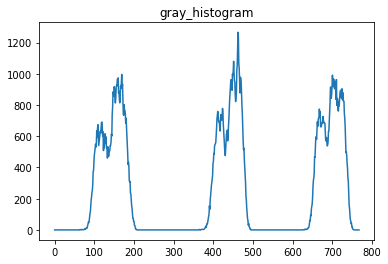

In [27]:

# importing required libraries of opencv 
import cv2 
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# importing library for plotting 
from matplotlib import pyplot as plt 


# reads an input image 
img = cv2.imread('/home/ozgu/Desktop/DATASETS/UCMerced_LandUse/train/agricultural/agricultural12.jpg') 
b = np.zeros(256, dtype=np.int)
color = ('b','g','r')

histr_b = cv2.calcHist([img],[0],None,[256],[0,256])
histr_g = cv2.calcHist([img],[1],None,[256],[0,256])
histr_r = cv2.calcHist([img],[2],None,[256],[0,256])
    
histr = np.concatenate((histr_b,histr_g,histr_r), axis=0)
print("s:" , len(histr))  
print((np.reshape(histr.astype(int), (256*3))))
    
    
    #plt.plot(histr,color = col)
    #plt.xlim([0,256])
#plt.title("RGB_histogram")
#plt.show()
# find frequency of pixels in range 0-255 

# reads an input image 

# show the plotting graph of an image 
plt.plot(histr) 
plt.title("gray_histogram")
plt.show() 


In [13]:
def write(feat, name):
    file = open(name,"a")
    
    for i  in range(len(feat)):
        file.write(str(feat[i]))
        file.write("\n")
    file.close()
    return "done!"

In [14]:
def find_name(string):
    return os.path.basename(string)


In [28]:
import os
import pandas as pd
import cv2

histogram_all = [] # histograms of all images in given directory
image_name = [] # all image names in given directory
all_distance_q = [] # all distance values (one query)
files = []
sim_image_name = [] # image names after distance calculation (one query)

all_sim_all_hist = [] # for all query image names
all_distance_all_hist = [] # for all distance results 

path = '/home/ozgu/Desktop/DATASETS/UCMerced_LandUse/train_all/'


# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))



for i in range(len(files)):
    #img = cv2.imread(files[i],0)  # read image as gray
    img = cv2.imread(files[i])  # read image as RGB
    #print(find_name(files[i]))
    image_name.append(find_name(files[i]))# find the name of image
    histr_b = cv2.calcHist([img],[0],None,[256],[0,256])
    histr_g = cv2.calcHist([img],[1],None,[256],[0,256])
    histr_r = cv2.calcHist([img],[2],None,[256],[0,256])

    histr = np.concatenate((histr_b,histr_g,histr_r), axis=0)
    hist_arr = np.reshape(histr.astype(int), (256*3)) 
    #print("shape : " , hist_arr.shape())
    histogram_all.append(hist_arr) 
    

#print(histogram_all[4])
#print(image_name[4])


#similarity/ distance
for i_test  in range(len(histogram_all)):
    test = histogram_all[i_test]
    all_distance_q = []  
    sim_image_name = []
    i_name = image_name[i_test]
    
    for i_all  in range(len(histogram_all)):
        temp = histogram_all[i_all]
        distance = euclidean_distance(test, temp)
        #print("distance:" ,distance)
        all_distance_q.append(distance)
        sim_image_name.append(image_name[i_all])
        
    #write(sim_image_name,i_name+ "_n.txt")
    #write(all_distance_q,i_name + "_d.txt")
        
    all_sim_all_hist.append(sim_image_name)
    all_distance_all_hist.append(all_distance_q)
    
    
    # initialize list of lists 
    data = {'Image_name': sim_image_name, 'Distance': all_distance_q} 

    # Create the pandas DataFrame 
    df = pd.DataFrame(data, columns = ['Image_name', 'Distance']) 

    #sort
    new_df = df.sort_values(by=['Distance'])
   
    new_df.to_csv(i_name + ".csv", sep=',',index=True)
    
   
    #print(saved_column[3])
    
print("names : " ,len(all_sim_all_hist))
print("all_ distance : ",len(all_distance_all_hist))

#print("1- names : " ,all_sim_all_hist[1])
#print("1- all_ distance : ",all_distance_all_hist[1])

#img = cv2.imread('/home/ozgu/Desktop/DATASETS/UCMerced_LandUse/train/agricultural/agricultural12.jpg',0) #

#histr = cv2.calcHist([img],[0],None,[256],[0,256]) 


('names : ', 2100)
('all_ distance : ', 2100)


In [30]:
def one_zero_GT(GT_temp, class_len, length):
    l = []
    
    for i in range(length):
        if i <= class_len:
            l.append(1)
        else:
            l.append(0)
            
    #print("GT : ", len(l))
    return l

In [28]:
class_names = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 
               'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']

def find_label_index(name):
     
        if class_names[0] == name :
                return 1
        elif class_names[1] == name :
                return 2 
        elif class_names[2] == name :
                return 3  
        elif class_names[3] == name :
                return 4  
        elif class_names[4] == name :
                return 5  
        elif class_names[5] == name :
                return 6  
        elif class_names[6] == name :
                return 7  
        elif class_names[7] == name :
                return 8  
        elif class_names[8] == name :
                return 9  
        elif class_names[9] == name :
                return 10  
        elif class_names[10] == name :
                return 11 
        elif class_names[11] == name :
                return 12  
        elif class_names[12] == name :
                return 13 
        elif class_names[13] == name :
                return 14  
        elif class_names[14] == name :
                return 15 
        elif class_names[15] == name :
                return 16
        elif class_names[16] == name :
                return 17 
        elif class_names[17] == name :
                return 18 
        elif class_names[18] == name :
                return 19  
        elif class_names[19] == name :
                return 20  
        elif class_names[20] == name :
                return 21  
        else:
            return -1
        


    
    
    
    

In [44]:
def one_zero(temp, class_name):
    l = []
    
    for i in range(len(temp)):
        element = temp[i].split(".")
        
        element_n = element[0]
        #print("cname ", class_name)
        #print("temp ", element_n[0:len(element_n) - 2])
        if element_n[0:len(element_n) - 2] == class_name:
            l.append(1)
        else:
            l.append(0)
    #print("pred : ", len(l))        
    return l

In [11]:
import os
path = '/home/ozgu/Desktop/EXP/shallow_methods/bgr_histogram_euc/'

# ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 
# 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 
# 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']

#total_class_sample = [87, 86, 84, 85, 84, 85, 84, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86 ]
total_class_sample = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100 ]
files = []


# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))
            
print(len(files))           

2100


In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support




class_names = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 
               'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
temp = []

total_map = 0.0
total_anmrr = 0.0

total_p = 0.0
total_f1 = 0.0
total_acc = 0.0


for i_class in range(len(class_names)):
    class_name = class_names[i_class]
    temp = []

    all_query = []
    all_GT = []

    # They hold labels as 0,1 
    #1:correct, 0: incorrect
    all_GT_TF = [] 
    all_query_TF = []

    p_one = 0.0
    r_one = 0.0
    f1_one = 0.0

    p_all = 0.0
    f1_all = 0.0

    acc_one = 0.0
   #print(len(files))
    
    for i in range(len(files)):
        GT_temp = []
        df = pd.read_csv(files[i])
        #print("1")
        saved_column = df['Image_name'] 
        temp = saved_column.values.tolist()
        #print("temp",temp)
        all_query.append(temp)
        all_query_TF.append(one_zero(temp, class_name))
        #print("2")
        #print(temp)
        GT_temp = create_GT_new(total_class_sample[i_class],temp ,class_name)
        #print ("gt : " , one_zero_GT(GT_temp, len(files)))
        gt_one_zero = (one_zero_GT(GT_temp, total_class_sample[i_class] ,len(files)))
        
        all_GT_TF.append(gt_one_zero)
       # print("GT temp",GT_temp)
        all_GT.append(GT_temp)
        #print("3")
        #print("gt_one_zero " , gt_one_zero)
        #print(" one_zero(temp, class_name) ",  one_zero(temp, class_name))
        #print("gt_one_zero : ", gt_one_zero)
        #print("pred : ", one_zero(temp, class_name))
        
       
        #acc_one = acc_one + find_acc(gt_one_zero, one_zero(temp, class_name))
        acc_one = acc_one + find_acc(gt_one_zero, one_zero(temp, class_name))
        #print("4")
        p_all = p_all +  find_pre(gt_one_zero, one_zero(temp, class_name))
        f1_all = f1_all +  f1(gt_one_zero, one_zero(temp, class_name))
    
    
   # print("all_GT[9]: ",all_GT[9], "all_QUERY[9]: " , all_query[9] )
    print("CLASS : ", class_name)
    print("mAP : ", new_MAP(all_query_TF, all_GT_TF))
    #print("mAP : ", MAP(all_query, all_GT))
    print("ANMRR : ", ANMRR(all_query, all_GT))


    print("P@all : ", p_all/len(files)) 
    print("f1 score : ", f1_all/len(files)) 
    print("Acc. : ", acc_one/len(files)) 
    print("\n")
    
    total_map = total_map + new_MAP(all_query_TF, all_GT_TF)
    total_anmrr = total_anmrr + ANMRR(all_query, all_GT)

    total_p = total_p + (p_all/len(files))
    total_f1 = total_f1 + (f1_all/len(files))
    total_acc = total_acc + (acc_one/len(files))

print("----TOTAL-----")
print("mAP : ", total_map/(len(class_names)))
print("ANMRR : ", total_anmrr/(len(class_names)) )


print("P@all : ",total_p/(len(class_names)) ) 
print("f1 score : ", total_f1/(len(class_names)) ) 
print("Acc. : ", total_acc/(len(class_names)) )    



('CLASS : ', 'agricultural')
('mAP : ', 0.048839078601738355)
('ANMRR : ', 0.9511203962286693)
('P@all : ', 0.034371428571428594)
('f1 score : ', 0.0342004264392326)
('Acc. : ', 0.0016367346938775441)


('CLASS : ', 'airplane')
('mAP : ', 0.049348276868503765)
('ANMRR : ', 0.9456674304809636)
('P@all : ', 0.03812380952380981)
('f1 score : ', 0.037934138829661)
('Acc. : ', 0.0018154195011337746)


('CLASS : ', 'baseballdiamond')
('mAP : ', 0.048166951797221844)


KeyboardInterrupt: 

In [ ]:
#p_r_f1 come from sclearn

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support




class_names = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 
               'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
temp = []

total_map = 0.0
total_anmrr = 0.0

total_p = 0.0
total_f1 = 0.0
total_acc = 0.0



for i_class in range(len(class_names)):
    class_name = class_names[i_class]
    temp = []

    all_query = []
    all_GT = []

    # They hold labels as 0,1 
    #1:correct, 0: incorrect
    all_GT_TF = [] 
    all_query_TF = []

    p_one = 0.0
    r_one = 0.0
    f1_one = 0.0

    p_all = 0.0
    f1_all = 0.0

    acc_one = 0.0
   #print(len(files))
    
    for i in range(len(files)):
        GT_temp = []
        df = pd.read_csv(files[i])
        #print("1")
        saved_column = df['Image_name'] 
        temp = saved_column.values.tolist()
        #print("temp",temp)
        all_query.append(temp)
        all_query_TF.append(one_zero(temp, class_name))
        #print("2")
        #print(temp)
        GT_temp = create_GT_new(total_class_sample[i_class],temp ,class_name)
        #print ("gt : " , one_zero_GT(GT_temp, len(files)))
        gt_one_zero = (one_zero_GT(GT_temp, total_class_sample[i_class] ,len(files)))
        
        all_GT_TF.append(gt_one_zero)
       # print("GT temp",GT_temp)
        all_GT.append(GT_temp)
        #print("3")
        #print("gt_one_zero " , gt_one_zero)
        #print(" one_zero(temp, class_name) ",  one_zero(temp, class_name))
        acc_one = acc_one + accuracy_score(gt_one_zero, one_zero(temp, class_name))

        #p-r-fscore
        all_prf1 = precision_recall_fscore_support(gt_one_zero, one_zero(temp, class_name), average='micro')
        #print("4")
        p_all = p_all + all_prf1[0]
        f1_all = f1_all + all_prf1[2]
    
    
   # print("all_GT[9]: ",all_GT[9], "all_QUERY[9]: " , all_query[9] )
    print("CLASS : ", class_name)
    print("mAP : ", new_MAP(all_query_TF, all_GT_TF))
    #print("mAP : ", MAP(all_query, all_GT))
    print("ANMRR : ", ANMRR(all_query, all_GT))


    print("P@all : ", p_all/len(files)) 
    print("f1 score : ", f1_all/len(files)) 
    print("Acc. : ", acc_one/len(files)) 
    
    total_map = total_map + new_MAP(all_query_TF, all_GT_TF)
    total_anmrr = total_anmrr + ANMRR(all_query, all_GT)

    total_p = total_p + (p_all/len(files))
    total_f1 = total_f1 + (f1_all/len(files))
    total_acc = total_acc + (acc_one/len(files))

print("----TOTAL-----")
print("mAP : ", total_map/(len(class_names)))
print("ANMRR : ", total_anmrr/(len(class_names)) )


print("P@all : ",total_p/(len(class_names)) ) 
print("f1 score : ", total_f1/(len(class_names)) ) 
print("Acc. : ", total_acc/(len(class_names)) )    



In [ ]:
def create_GT(len_class, query, class_name):
    l = []
    for i in range(len(query)):
        if class_name in query[i]:
            l.append(query[i])
    
    if len_class == len(l):
        for i in range(len(query)):
            if class_name in query[i]:
                continue
                
            else:
                l.append(query[i])
          
    else:
        print("something is wrong!")
        
    return l

In [12]:
def create_GT_new(len_class, query, class_name):
    l = []
    for i in range(len(query)):
        if class_name in query[i]:
            l.append(query[i])
        
    return l

In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[33,2,0,0,0,0,0,0,0,1,3], 
        [3,31,0,0,0,0,0,0,0,0,0], 
        [0,4,41,0,0,0,0,0,0,0,1], 
        [0,1,0,30,0,6,0,0,0,0,1], 
        [0,0,0,0,38,10,0,0,0,0,0], 
        [0,0,0,3,1,39,0,0,0,0,4], 
        [0,2,2,0,4,1,31,0,0,0,2],
        [0,1,0,0,0,0,0,36,0,2,0], 
        [0,0,0,0,0,0,1,5,37,5,1], 
        [3,0,0,0,0,0,0,0,0,39,0], 
        [0,0,0,0,0,0,0,0,0,0,38]]

df_cm = pd.DataFrame(array, index = [i for i in ['Tom', 'Jack', 'nick', 'juli', 'Tom', 'Jack', 'nick', 'juli','Tom', 'Jack', 'nick', 'juli','Tom', 'Jack', 'nick', 'juli','Tom', 'Jack', 'nick', 'juli']],
                  columns = [i for i in "abcdefghklmn"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

AssertionError: 12 columns passed, passed data had 11 columns

In [13]:
def find_TP(y_true, y_pred):
    c_TP = 0
    # counts the number of true positives (y_true = 1, y_pred = 1)
    for i in range(len(y_true)):
        if ((y_true[i] == 1) & (y_pred[i] == 1)):
                   c_TP = c_TP + 1
                   
    return c_TP

def find_FN(y_true, y_pred):
    c_FN = 0
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    for i in range(len(y_true)):
        if ((y_true[i] == 1) & (y_pred[i] == 0)):
                   c_FN = c_FN + 1
                   
    return c_FN
   
def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    c_FP = 0
    for i in range(len(y_true)):
        if ((y_true[i] == 0) & (y_pred[i] == 1)):
                   c_FP = c_FP + 1
                   
    return c_FP
    
def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    c_TN = 0
 
    for i in range(len(y_true)):
        if ((y_true[i] == 0) & (y_pred[i] == 0)):
                   c_TN = c_TN + 1
                   
    return c_TN
    

In [14]:
def find_pre(y_true, y_pred):
    TP = find_TP(y_true, y_pred)
    FP = find_FP(y_true, y_pred)
    
    return (float)(TP)/ (float)(TP + FP)



In [15]:
def find_recall(y_true, y_pred):
    TP = find_TP(y_true, y_pred)
    FN = find_FN(y_true, y_pred)
    
    return (float)(TP)/((float)(TP + FN))

In [16]:
def find_acc(y_true, y_pred):
    TP = find_TP(y_true, y_pred)
    FP = find_FP(y_true, y_pred)
    FN = find_FN(y_true, y_pred)
    TN = find_TN(y_true, y_pred)
    
    return (float)(TP)/((float)(TP +TN + FP +FN))

In [17]:
def f1(y_true, y_pred):
    P = find_pre(y_true, y_pred)
    R = find_recall(y_true, y_pred)
    #print("P: ", P, "R:" ,R)
    
    if (P == 0) or (R == 0):
        return 0.0
    
    return 2.0 * ((P * R)/(P + R))

In [48]:
print("TP : ", find_TP([1,0,1,1,1,0,0],[1,1,1,0,0,0,1]))
print("FP : ", find_FP([1,0,1,1,1,0,0],[1,1,1,0,0,0,1]))
print("FN : ", find_FN([1,0,1,1,1,0,0],[1,1,1,0,0,0,1]))
print("TN : ", find_TN([1,0,1,1,1,0,0],[1,1,1,0,0,0,1]))

print(find_pre([1,0,1,1,1,0,0],[1,1,1,0,0,0,1]))
print(find_recall([1,0,1,1,1,0,0],[1,1,1,0,0,0,1]))
print(find_acc([1,0,1,1,1,0,0],[1,0,1,1,1,0,0]))
print(f1([1,0,1,1,1,0,0],[1,1,1,0,0,0,1]))

('TP : ', 2)
('FP : ', 2)
('FN : ', 2)
('TN : ', 1)
0.5
0.5
0.571428571429
0.5


In [ ]:
# Import pandas library 
import pandas as pd 
a = ['Tom', 'Jack', 'nick', 'juli']
b = [99, 101, 95, 90]

# initialize list of lists 
data = {'Image_name': sim_image_name, 'Distance': all_distance_q} 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Image_name', 'Distance']) 
  
# print dataframe. 
df 



new_df = df.sort_values(by=['Distance'])

new_df.to_csv("file_name_n.csv", sep=',',index=True)

print(new_df)
